In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [25]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [26]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='fivethirtyeight')

In [27]:
# SQl lentelė - InsuranceUSA7cols. Ar yra priklausoimybė tarp lyties, 
# kūno masės indekso (bmi), rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

In [28]:
#sql užklausa per pandas sql_query
sql="""select * from InsuranceUSA7cols"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


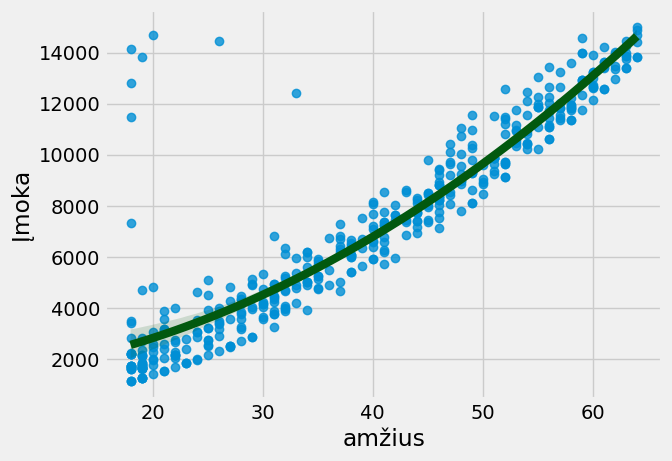

In [29]:
a = sns.regplot(data=df.query('charges <= 15000'), x='age', y='charges', order = 2, line_kws={'color':'xkcd:deep green'})
a.set_xlabel('amžius')
a.set_ylabel('Įmoka')
plt.show()

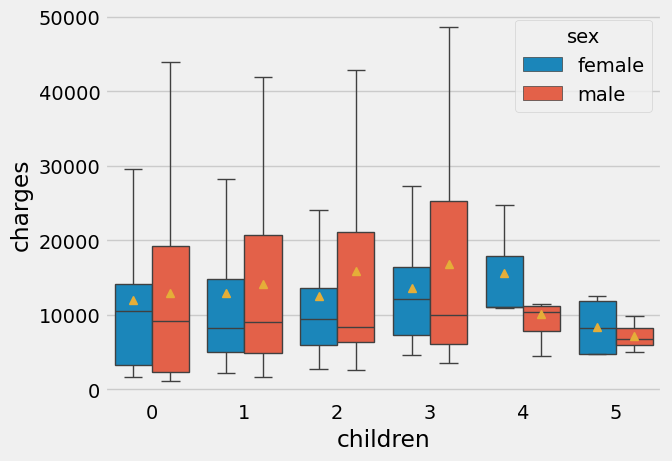

In [34]:
sns.boxplot(data=df, x='children',y='charges', showmeans=True, showfliers=False, hue='sex')
plt.show()

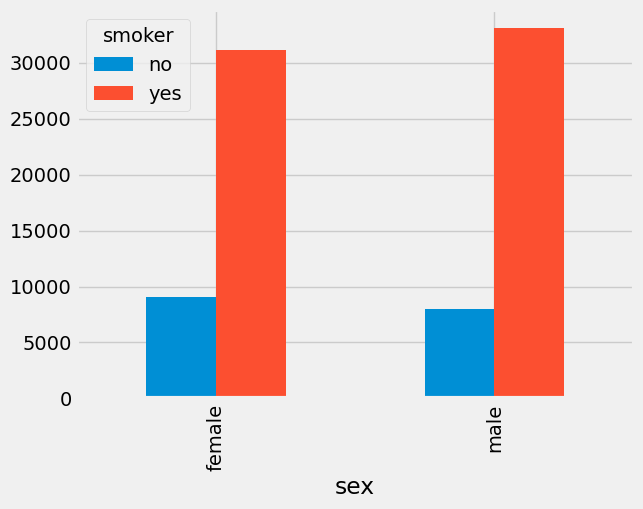

In [31]:
df.groupby(['sex','smoker'])['charges'].mean().unstack().plot(kind='bar')
plt.show()

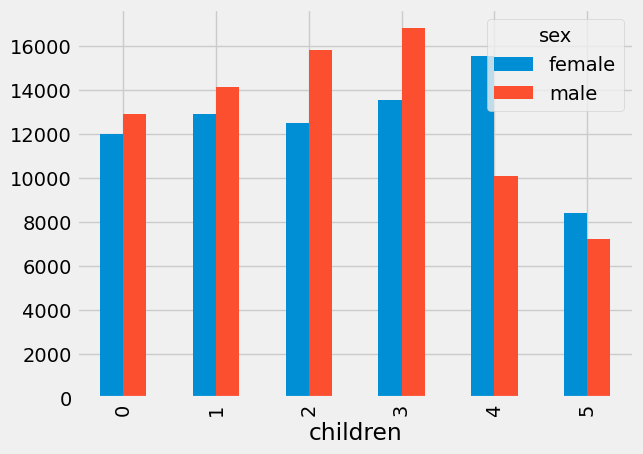

In [32]:
df.groupby(['children','sex'])['charges'].mean().unstack().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

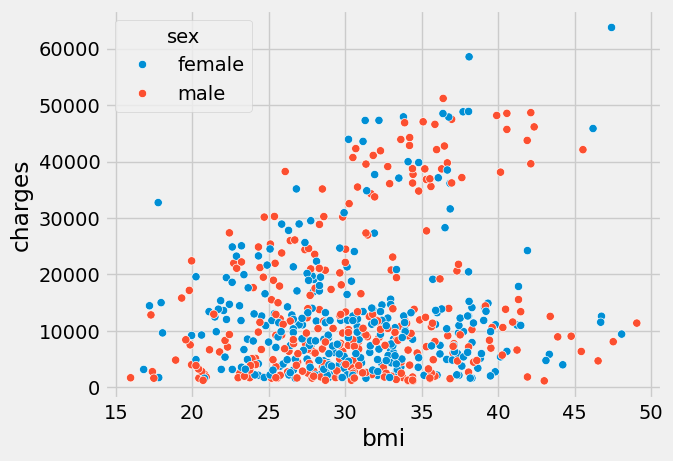

In [35]:
sns.scatterplot(data=df,x='bmi',y='charges', hue='sex')